Cover:
1. <b>PCA</b> (unspervised data compression)
2. <b>Linear Discriminant Analysis</b> (supervised dim reduction for maximizing class separatability) 
3. <b> Kernel Principal Component Analysis</b> (nonlinear dim reduction 

I implemented PCA and Kmeans in Matlab so i'm interested to do so in Python

<b> PCA</b> aims to find the lower dimension subspace onto which to project the data such that the squared projection error is minimised. It tries to find the orthogonal component axes of maximum variaance in a dataset  (see hardnotebook)
Trying to reduce an n-dimensionanal feature space to a <i>k</i> dimensions such that k<<n
1. Feature Scaling   
2. Compute the covariance matrix (by singular value decomposition)
    the covariance computation will return 3 matrices, interested in the first matrix U  
3. Get the eigenvector matrix which projects X to a lower subspace Z of k dimensions
    the first k columns from U are eigenvectors 
    U(:,1:k)'* X = z


In [1]:
import pandas as pd


In [3]:
df_wine = pd.read_csv('wine.data.txt', header=None)
df_wine.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
#Preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values #first column is output Y column
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

<b> Covariance Matrix</b>

Recall that <i> variance</i> measures the variability or spread in a dataset. More specifically, variance is average squared deviation from the mean.   <b> Sum( xi - ui)^2/N </b>  

<b>Covariance Matrix</b>, E (Sigma irl),  measures the extent to which two features xi, xj, move in the same direction. Its the average of the product of their mean deviation.   
............ <b> Sum(xi - ui)(xj - uj)/N </b>   
Covariance matrix is nxn dimensions.  A positive covariance between two features indicates that they increase or decrease together, conversely a negative covariance means that the features change diametrically.  




In [7]:
import numpy as np
cov_matrix = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
print('\n EigenValues \n%s' %eigen_vals)



 EigenValues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


In [8]:
#Plot variance explained ratio of an eigenvalue--> fraction of an eigenvalue/sum of all eigenValues
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)] #descending order we want the top k eigen values
cum_var_exp = np.cumsum(var_exp) #calculates the cumulative sum


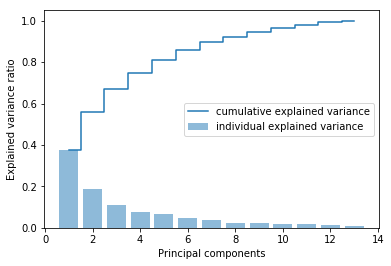

In [9]:
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance') #13 eigen values
plt.step(range(1,14), cum_var_exp, where='mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

the plot shows that the first principal component accounts for for 40% of the variance, while first 2 would be 60% (refresh on message of cumulative frequency) 

In [15]:
eigen_vecs.shape

(13, 13)

<b> Feature Transform Step</b>  
The eigen pairs have been decomposed from the covariance matrix, so the next step will be:  
1. sort eigen pairs in descending order
2. construct the projection matrix (U) from the top k eigenpairs
3. Use the projection matrix to transform the data into lower dimensional subspace

In [10]:

eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i])
for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [17]:
#Collect the eigenvectors that captured 60% of the variance in the dataset
# in this case arbitraliy choose k=2 but irl choose k based on learning curve + evaluation metric 
u= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:,np.newaxis]))
print('Matrix U: \n',u)


Matrix U: 
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [18]:
#transform an instance x (1x13 row vector) with 13 features on to the PCA subspace obtaining z, a now 2-dim sample vector  
# z now has 2 featurs
#z =  ux 
X_train_std[0].dot(u)


array([ 2.59891628,  0.00484089])

In [20]:
X_train_pca = X_train_std.dot(u)

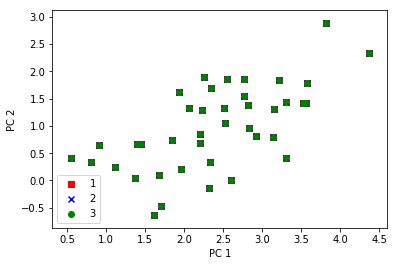

In [21]:
#visualise the now Transformed Wine training set now stored as 124x2 matrix
colors =['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==1, 0],
               X_train_pca[y_train==1,1],
               c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

<b> PCA in Scikit</b>   
The code below will classify the transformed Wine dataset using logistic regression and visualise the decision regions via plot decision region function.

In [24]:
from matplotlib.colors import ListedColormap


In [25]:
def plot_decision_regions(X,y,classifier, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red','blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #each unique label will have its own color
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1  #min and max values for each feature , -1 and +1 to extend range
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                np.arange(x2_min, x2_max, resolution))     #meshgrid creates a grid using the feacture vector pairs
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #.ravel() unrolls a matrix into  1-D array or vector, .T means transpose
    Z = Z.reshape(xx1.shape)  #Z has dimensions of xx1
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)  #contourf fills region for each label y, classier stores predictions in Z 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        
    

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)
lr= LogisticRegression()


In [28]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

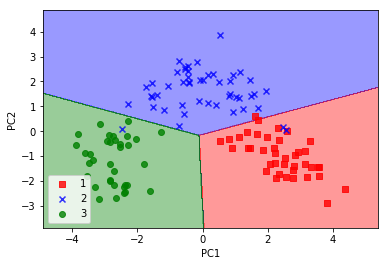

In [29]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

The above plot shows the decision regions for the training model reduced to 2 principal component axes.
Plot the decision region of the test set to see how well it did on class separation 

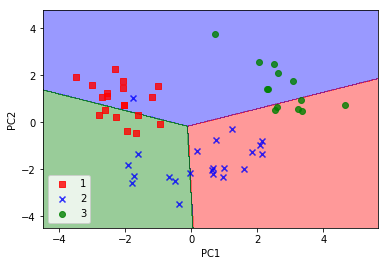

In [30]:
plot_decision_regions(X_test_pca, y_test,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

# Linear Discriminant Analysis   

<b> Linear Discriminat Analysis</b> is a supervised algorithm that can be used  for feature extraction in order to reduce high dimensional data and overfitting in non-regularised models.
LDA aims to find a feature subspace that optimises class separatbility,  